In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors
sns.set()

df_n = pd.read_excel('db.xlsx')
df_n = df_n.dropna()
df_n.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
5,2022-10-01,10,1,1043,223.800000,95.28,18.466000,242.033333,5.008802,2181.0
7,2022-10-01,10,1,1345,222.625000,58.23,19.187500,111.506250,35.030529,1414.0


In [30]:
df_n.count()

Дата для смены                15305
Месяц                         15305
Смена                         15305
Самосвал                      15305
Avg-Вес по СКЗ, т             15305
Sum-Расстояние, км            15305
Avg-Средняя скорость, км/ч    15305
Avg-Перепад высот             15305
StDev-Перепад высот           15305
Расход топлива, л             15305
dtype: int64

In [2]:
df_n.tail()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
19050,2022-03-31,3,2,1494,208.466667,94.64,20.422857,137.221429,20.363322,1702.0
19051,2022-03-31,3,2,1497,224.166667,90.28,16.645000,110.327778,60.291301,1627.0
19052,2022-03-31,3,2,1499,213.125000,95.37,18.866875,130.162500,41.011882,1752.0
19054,2022-03-31,3,2,1503,226.937500,82.54,16.953750,179.475000,70.083774,1775.0
19055,2022-03-31,3,2,1504,219.066667,93.79,20.134000,139.846667,18.230816,1636.0


In [3]:
df_n.describe()

,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
count,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000
mean,6.036263,1.498007,1331.711663,221.621772,82.892749,19.485603,114.736675,35.938237,1566.611696
std,2.964074,0.500012,182.831561,9.480274,17.320191,1.686576,60.974647,30.925081,303.049131
min,1.000000,1.000000,1035.000000,190.000000,20.010000,15.001667,-49.918182,0.416333,500.000000
25%,4.000000,1.000000,1044.000000,216.636364,74.580000,18.441111,81.257895,8.977947,1416.000000
50%,6.000000,1.000000,1385.000000,223.500000,85.700000,19.582778,119.470000,29.724812,1608.000000
75%,8.000000,2.000000,1492.000000,228.187500,94.880000,20.575000,153.873333,56.158528,1771.000000
max,11.000000,2.000000,1866.000000,249.562500,119.950000,24.975200,249.875000,320.915607,2476.000000


In [4]:
print(df_n.isnull().sum ())
print(f'Общее количество пропусков в датасете = {df_n.isnull().sum().sum ()}')

Дата для смены                0
Месяц                         0
Смена                         0
Самосвал                      0
Avg-Вес по СКЗ, т             0
Sum-Расстояние, км            0
Avg-Средняя скорость, км/ч    0
Avg-Перепад высот             0
StDev-Перепад высот           0
Расход топлива, л             0
dtype: int64
Общее количество пропусков в датасете = 0


<Axes: >

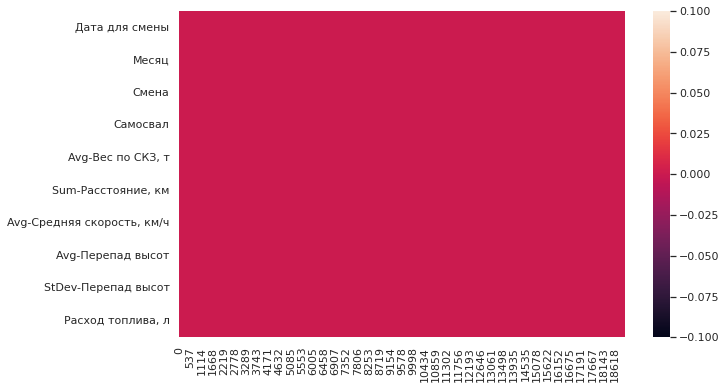

In [5]:
#визуализируем пропуски
# x - строки
plt.figure(figsize=(10, 6))
sns.heatmap(df_n.isna().transpose())
#plt.savefig('/home/anya-mankova/emco/images/nullst.png', dpi=70)

Количество наблюдений 15305


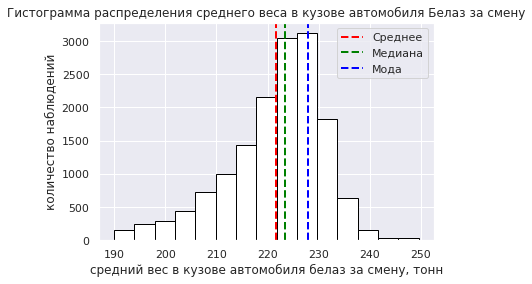

In [6]:
avg_weight = df_n['Avg-Вес по СКЗ, т'].dropna()
print(f'Количество наблюдений {avg_weight.count()}')
# 17937 строк с данными


plt.hist(avg_weight, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний вес в кузове автомобиля белаз за смену, тонн')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего веса в кузове автомобиля Белаз за смену')
plt.axvline(avg_weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_weight.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_weight.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

#plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_hist.png', dpi=80)
plt.show()

In [7]:
print("Дисперсия: ", np.var(avg_weight))
print("Стандартное отклонение: ", np.std(avg_weight))
print("Коэффициент вариации: ", avg_weight.std() / avg_weight.mean())
print("Межквартильный размах: ", avg_weight.quantile(0.75) - avg_weight.quantile(0.25))
print()

#тест Шапиро=Уилка не подходит, поскольку выборка более 5000

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_weight, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  89.86972083209805
Стандартное отклонение:  9.479964178840449
Коэффициент вариации:  0.04277681656038768
Межквартильный размах:  11.551136363636004

Тест Лиллиефорса: критерий = 0.086, p-val = 0.001


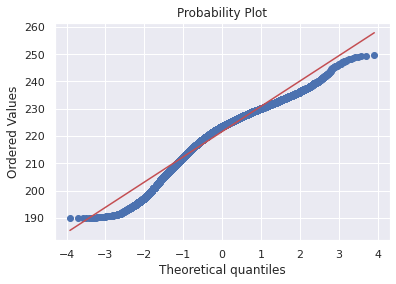

In [8]:
stats.probplot(avg_weight, dist="norm", plot=plt)
#plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_qqplot.png', dpi=50)
plt.show()

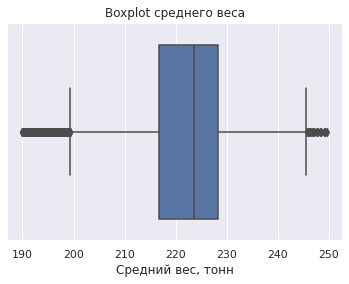

In [9]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_weight)
plt.xlabel('Средний вес, тонн')
plt.title('Boxplot среднего веса')
#plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 15305


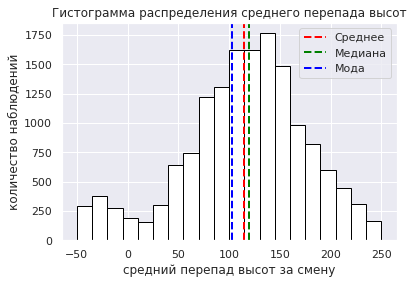

In [10]:
avg_height = df_n['Avg-Перепад высот'].dropna()
print(f' Количество наблюдений {avg_height.count()}')
# 17242 строк с данными
plt.hist(avg_height, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний перепад высот за смену')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего перепада высот')
plt.axvline(avg_height.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_height.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_height.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

#plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_hist.png', dpi=100)
plt.show()

In [11]:
print("Дисперсия: ", np.var(avg_height))
print("Стандартное отклонение: ", np.std(avg_height))
print("Коэффициент вариации: ", avg_height.std() / avg_height.mean())
print("Межквартильный размах: ", avg_height.quantile(0.75) - avg_height.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_height, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  3717.664634135464
Стандартное отклонение:  60.972654806359415
Коэффициент вариации:  0.5314311824215698
Межквартильный размах:  72.61543859649089

Тест Лиллиефорса: критерий = 0.046, p-val = 0.001


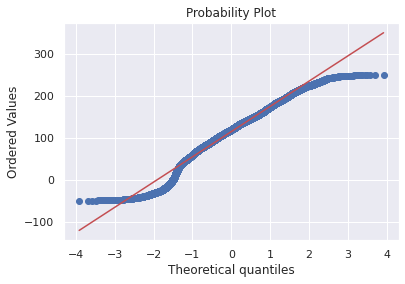

In [12]:
stats.probplot(avg_height, dist="norm", plot=plt)
#plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_qqplot.png', dpi=50)
plt.show()

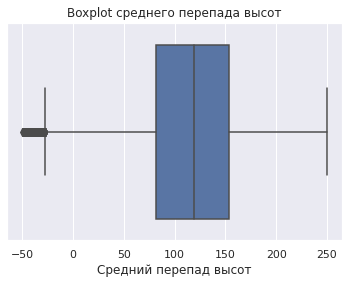

In [13]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_height)
plt.xlabel('Средний перепад высот')
plt.title('Boxplot среднего перепада высот')
#plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 15305


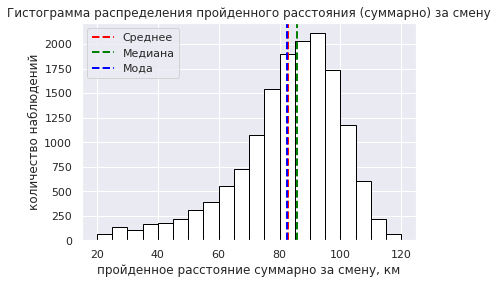

In [14]:
dist = df_n['Sum-Расстояние, км'].dropna()
print(f' Количество наблюдений {dist.count()}')
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

#plt.savefig('/home/anya-mankova/emco/images/dist/dist_hist.png', dpi=100)
plt.show()

In [15]:
print("Дисперсия: ", np.var(dist))
print("Стандартное отклонение: ", np.std(dist))
print("Коэффициент вариации: ", dist.std() / dist.mean())
print("Межквартильный размах: ", dist.quantile(0.75) - dist.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(dist, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  299.9693987784422
Стандартное отклонение:  17.31962467198531
Коэффициент вариации:  0.2089469903588642
Межквартильный размах:  20.299999999999997

Тест Лиллиефорса: критерий = 0.079, p-val = 0.001


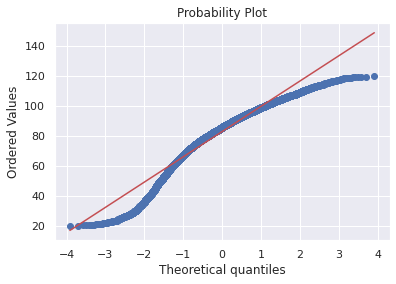

In [16]:
stats.probplot(dist, dist="norm", plot=plt)
#plt.savefig('/home/anya-mankova/emco/images/dist/dist_qqplot.png', dpi=50)
plt.show()

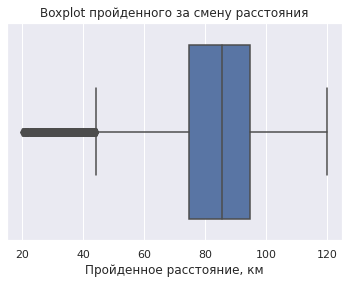

In [17]:
plt.figure(facecolor='white')
sns.boxplot(x=dist)
plt.xlabel('Пройденное расстояние, км')
plt.title('Boxplot пройденного за смену расстояния')
#plt.savefig('/home/anya-mankova/emco/images/dist/dist_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 15305


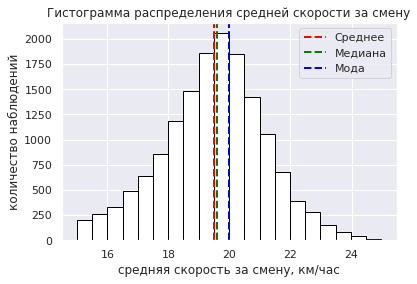

In [18]:
avg_speed = df_n['Avg-Средняя скорость, км/ч'].dropna()
print(f' Количество наблюдений {avg_speed.count()}')
# 18275 строк с данными
plt.hist(avg_speed, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средняя скорость за смену, км/час')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения средней скорости за смену')
plt.axvline(avg_speed.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_speed.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_speed.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

#plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_hist.png', dpi=100)
plt.show()

In [19]:
print("Дисперсия: ", np.var(avg_speed))
print("Стандартное отклонение: ", np.std(avg_speed))
print("Коэффициент вариации: ", avg_speed.std() / avg_speed.mean())
print("Межквартильный размах: ", avg_speed.quantile(0.75) - avg_speed.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_speed, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  2.8443528308575425
Стандартное отклонение:  1.6865209251170121
Коэффициент вариации:  0.08655498116739291
Межквартильный размах:  2.133888888888901

Тест Лиллиефорса: критерий = 0.031, p-val = 0.001


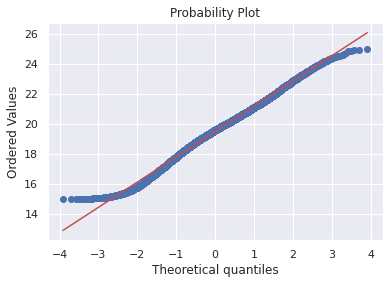

In [20]:
stats.probplot(avg_speed, dist="norm", plot=plt)
#plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_qqplot.png', dpi=50)
plt.show()

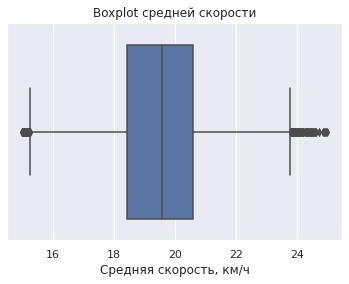

In [21]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_speed)
plt.xlabel('Средняя скорость, км/ч')
plt.title('Boxplot средней скорости')
#plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_boxplot.png', dpi=50)
plt.show()

Количество наблюдений 15305


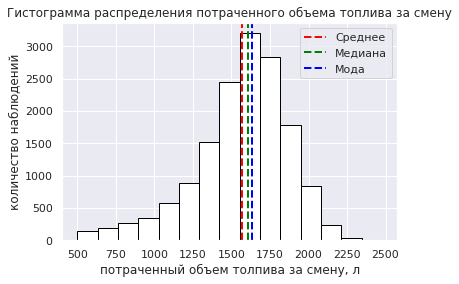

Все моды потраченного топлива: 1632.0


In [22]:
fuel = df_n['Расход топлива, л'].dropna()
print(f'Количество наблюдений {fuel.count()}')
# 18337 строк с данными
plt.hist(fuel, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(fuel.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

#plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_hist.png', dpi=100)
plt.show()

print(f'Все моды потраченного топлива: {", ".join(map(str, fuel.mode().tolist()))}')

In [23]:
print("Дисперсия: ", np.var(fuel))
print("Стандартное отклонение: ", np.std(fuel))
print("Коэффициент вариации: ", fuel.std() / fuel.mean())
print("Межквартильный размах: ", fuel.quantile(0.75) - fuel.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(fuel, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 5)}')

Дисперсия:  91832.77538755316
Стандартное отклонение:  303.0392307731017
Коэффициент вариации:  0.19344240320149905
Межквартильный размах:  355.0

Тест Лиллиефорса: критерий = 0.07, p-val = 0.001


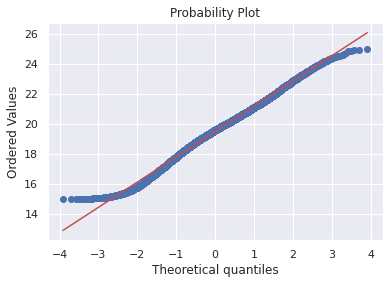

In [24]:
stats.probplot(avg_speed, dist="norm", plot=plt)
#plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_qqplot.png', dpi=50)
plt.show()

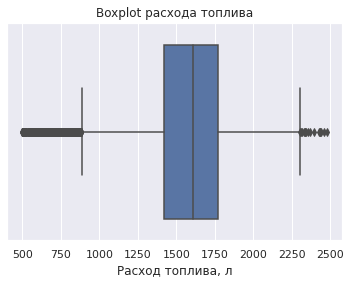

In [25]:
plt.figure(facecolor='white')
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')

#plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_boxplot.png', dpi=50)
plt.show()

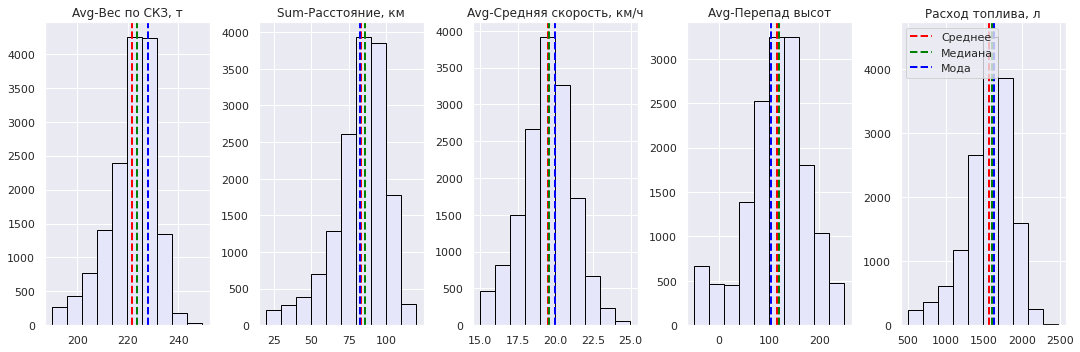

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), facecolor='white')

for i, column in enumerate(df_n[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']]):
    axes[i].hist(df_n[column], bins=10, edgecolor='black', color='#E6E6FA')
    axes[i].set_title(column)
    axes[i].axvline(df_n[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
    axes[i].axvline(df_n[column].median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
    axes[i].axvline(df_n[column].mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()
plt.tight_layout()
#plt.savefig('/home/anya-mankova/emco/images/all_hist.png', dpi=100)
plt.show()


<Axes: >

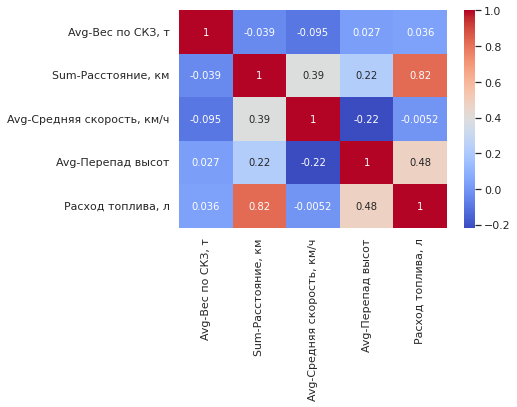

In [28]:
corr = df_n[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=100)

<Axes: xlabel='Расход топлива, л', ylabel='Avg-Перепад высот'>

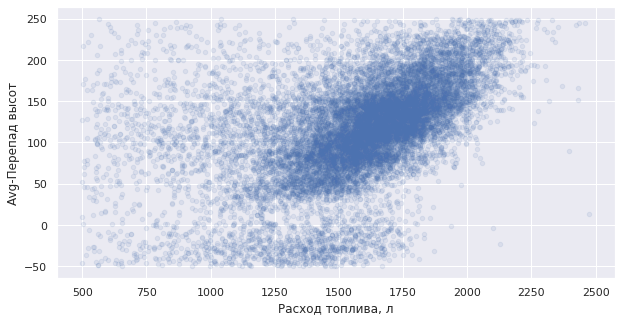

In [29]:
df_n.plot(x='Расход топлива, л', y='Avg-Перепад высот', kind='scatter', alpha=0.1, figsize=[10,5])